In [ ]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importer le data
data1= ps.read_csv('iris.csv')
data=data1[['SepalLengthCm','SepalWidthCm']]
data=data1.iloc[:,1:5]

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data.shape[1]

4

In [ ]:
#definition pour centrer les donnes
def center_data(data):
    g=data.mean()  #g=np.mean(data) en numpy
    return(data-g)

In [ ]:
### test
x_center=center_data(data)

In [ ]:
x_center
np.cov(x_center.T)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667
...,...,...,...,...
145,0.856667,-0.054,1.441333,1.101333
146,0.456667,-0.554,1.241333,0.701333
147,0.656667,-0.054,1.441333,0.801333
148,0.356667,0.346,1.641333,1.101333


In [ ]:
# fontion pour calculer matrice des données réduites
def reduire(data):
    return (data - data.mean()) / data.std()

In [ ]:
iris_reduit = reduire(data)
print(iris_reduit.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.897674      1.028611      -1.336794     -1.308593
1      -1.139200     -0.124540      -1.336794     -1.308593
2      -1.380727      0.336720      -1.393470     -1.308593
3      -1.501490      0.106090      -1.280118     -1.308593
4      -1.018437      1.259242      -1.336794     -1.308593


In [ ]:
#interpréter la matrice des corrélations
correlation = data.corr()
print(correlation)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


In [ ]:
#analyser les valeurs propres
valeurs_propres, vecteurs_propres = np.linalg.eig(correlation)

print("Valeurs propres : ", valeurs_propres)

Valeurs propres :  [2.91081808 0.92122093 0.14735328 0.02060771]


In [ ]:
# pourcentage d'inertie pour chaque axe principal
pourcentage_inertie = (valeurs_propres / np.sum(valeurs_propres)) * 100
print("Pourcentage d'inertie : ", pourcentage_inertie)

Pourcentage d'inertie :  [72.77045209 23.03052327  3.68383196  0.51519268]


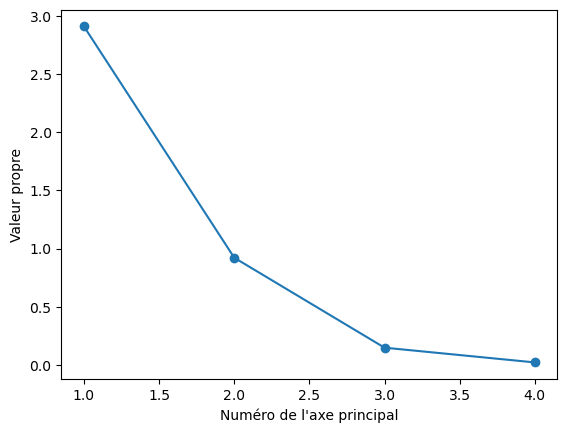

In [ ]:
import matplotlib.pyplot as plt
#tracer les valeurs propres principaux
plt.plot(np.arange(1, 5), valeurs_propres, marker='o')
plt.xlabel('Numéro de l\'axe principal')
plt.ylabel('Valeur propre')
plt.show()

In [ ]:
#Les composantes principales 
composantes_principales = vecteurs_propres[:, :2]
print("Composantes principales :\n", composantes_principales)

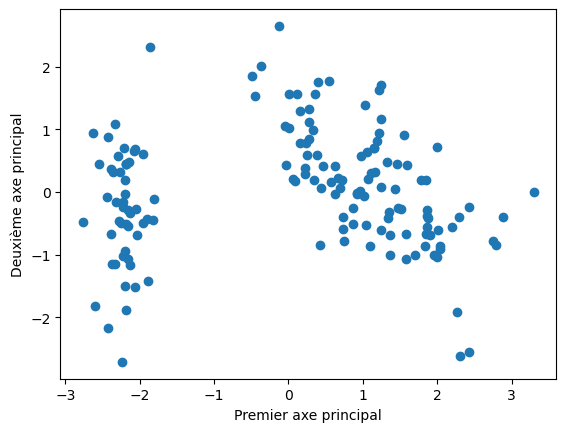

In [ ]:
# la représentation des individus sur le premier axe et le second axe
individus_projetes = np.dot(iris_reduit, composantes_principales)

plt.scatter(individus_projetes[:, 0], individus_projetes[:, 1])
plt.xlabel('Premier axe principal')
plt.ylabel('Deuxième axe principal')
plt.show()

In [ ]:
indices_plus_grande_contrib = np.argsort(np.sum(np.abs(individus_projetes), axis=1))[::-1][:3]
print("Indices des points de plus grande contribution :\n", indices_plus_grande_contrib)
print("Coordonnées des points de plus grande contribution :\n", individus_projetes[indices_plus_grande_contrib])

Indices des points de plus grande contribution :
 [117  15 131]
Coordonnées des points de plus grande contribution :
 [[ 2.4292403  -2.54822057]
 [-2.24394778 -2.71328133]
 [ 2.30834923 -2.61741528]]


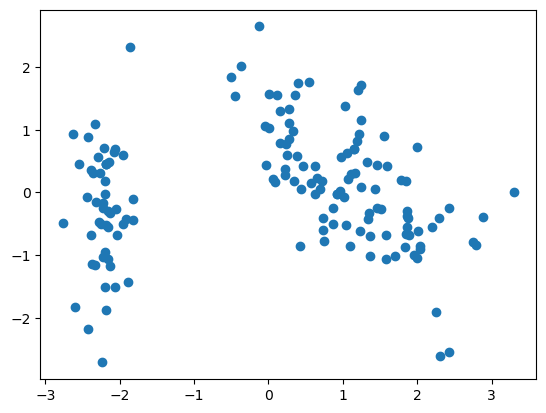

In [ ]:
plt.scatter(individus_projetes[:, 0], individus_projetes[:, 1])